In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_calib_0212 = pd.read_csv(r"F:\bicwin26\Summary\calibration_IR\calibration_Tourterelle_0212.csv",sep=";")
df_calib_0209 = pd.read_csv(r"F:\bicwin26\Summary\calibration_IR\calibration_Tourterelle_0209.csv",sep=";")

def convert_to_float(value):
    if type(value) == float:
        return value
    else:
        return float(value.replace(',', '.'))

T_IR_celsius_0212 = np.zeros(len(df_calib_0212['T_IR_celsius'].values))
T_ref_thermometrecuisine_0212 = np.zeros(len(df_calib_0212['T_thermometre_cuisine'].values))

for i in range(len(df_calib_0212['T_IR_celsius'].values)):
    
    T_IR_celsius_0212[i] = convert_to_float(df_calib_0212['T_IR_celsius'].values[i])
    T_ref_thermometrecuisine_0212[i] = convert_to_float(df_calib_0212['T_thermometre_cuisine'].values[i])

surface_0212 = df_calib_0212['surface'].values

T_IR_celsius_0209 = np.zeros(len(df_calib_0209['T_IR_celsius'].values))
T_ref_SBE56_num1_celsius = np.zeros(len(df_calib_0209['T_ref_SBE56_num1_celsius'].values))
T_ref_SBE56_num2_celsius = np.zeros(len(df_calib_0209['T_ref_SBE56_num2_celsius'].values))

for i in range(len(df_calib_0209['T_IR_celsius'].values)):
    
    T_IR_celsius_0209[i] = convert_to_float(df_calib_0209['T_IR_celsius'].values[i])
    T_ref_SBE56_num1_celsius[i] = convert_to_float(df_calib_0209['T_ref_SBE56_num1_celsius'].values[i])
    T_ref_SBE56_num2_celsius[i] = convert_to_float(df_calib_0209['T_ref_SBE56_num2_celsius'].values[i])

surface_0209 = df_calib_0209['surface'].values

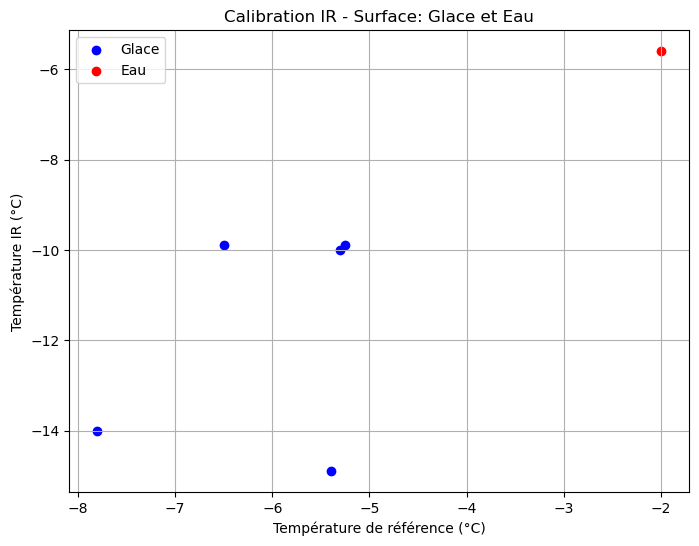

In [4]:
T_ref = np.concatenate((T_ref_thermometrecuisine_0212, np.nanmean([T_ref_SBE56_num1_celsius, T_ref_SBE56_num2_celsius], axis=0)))
T_IR = np.concatenate((T_IR_celsius_0212, T_IR_celsius_0209))
surface = np.concatenate((surface_0212, surface_0209))

idx2plot = np.where(surface == "glace")[0]
plt.figure(figsize=(8, 6))
plt.scatter(T_ref[idx2plot], T_IR[idx2plot], label='Glace', color='blue')
idx2plot = np.where(surface == "eau")[0]
plt.scatter(T_ref[idx2plot], T_IR[idx2plot], label='Eau', color='red')
plt.xlabel('Température de référence (°C)')
plt.ylabel('Température IR (°C)')
plt.title('Calibration IR - Surface: Glace et Eau')
plt.legend()
plt.grid()
plt.show()

In [ ]:
idx2plot = np.where(surface == "glace")[0]
plt.figure(figsize=(8, 6))
plt.scatter(T_ref[idx2plot], T_IR[idx2plot], label='Glace', color='blue')
plt.xlabel('Température de référence (°C)')
plt.ylabel('Température IR (°C)')
plt.title('Calibration IR - Surface: Eau')
plt.legend()
plt.grid()
plt.show()

### Estimation de l'émissivité pour chacune des surfaces observées

On relie La température, l'émissivité, et la puissance infrarouge émise par unité de surface par la relation :

$ M = \epsilon \cdot \sigma \cdot T^4 $

Avec $M$ la puissance infrarouge émise par unité de surface.

Et dans le cas "default", la conversion est (faussement) faite comme ceci :
$ M_{default} =  0.95 \cdot \sigma \cdot T^4 $

Notre but est d'avoir :

$T_{ref} = T_{IR}^{converti}$

On sait que $T_{IR}^{corps noir} = \frac{T_{IR}^{mesuré}}{(0.95)^{1/4}}$, car $\epsilon=0.95$ est l'émissivité par défaut utilisée par le drone.
Pour chaque point, on cherche l'émissivité $\epsilon$ de la surface correspondant.

Cette émissivité est telle que :

$T_{ref} = \epsilon^{1/4} T_{IR}^{corps noir}$

On peut donc avoir une estimation de l'éimssivité pour chaque point de mesure :

$\epsilon = \left(\frac{T_{ref}}{T_{IR}^{corps noir}}\right)^4$

Et donc :

$\epsilon = 0.95 \cdot \left(\frac{T_{ref}}{T_{IR}^{mesuré}}\right)^4$

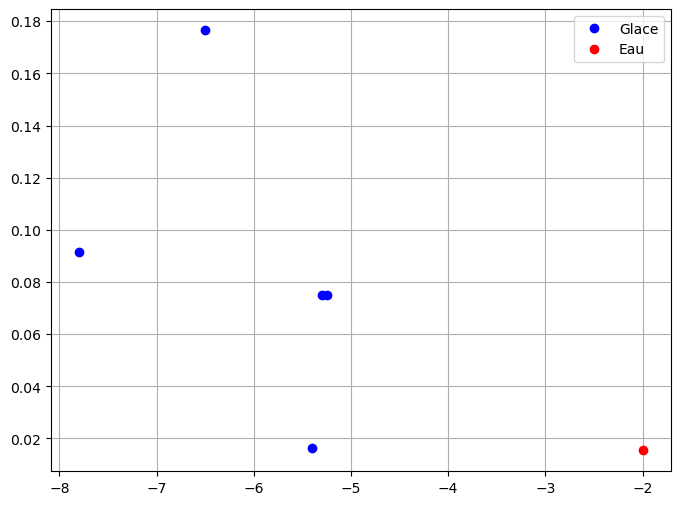

In [ ]:
idx2plot = np.where(surface == "glace")[0]
plt.figure(figsize=(8, 6))
plt.plot(T_ref[idx2plot],0.95*(T_ref[idx2plot]/T_IR[idx2plot])**4,'o', label='Glace', color='blue')
idx2plot = np.where(surface == "eau")[0]
plt.plot(T_ref[idx2plot],0.95*(T_ref[idx2plot]/T_IR[idx2plot])**4, 'o', label='Eau', color='red')
plt.legend()
plt.grid()
plt.show()

# à finiiiiiiiiiiiiiiiiiiiirrrrrrr !!!!!!!!!!!